In [1]:
from pushshift_py import PushshiftAPI
import requests
import liwc
import nltk
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

In [2]:
def get_pushshift_data(data_type, **kwargs):

    base_url = f"https://api.pushshift.io/reddit/search/{data_type}/"
    payload = kwargs
    request = requests.get(base_url, params=payload)
    return request.json()

In [3]:
def get_submission_comments(submission_id):
    
    base_url = f"https://api.pushshift.io/reddit/comment/search/?link_id={submission_id}&limit=20000"
    request = requests.get(base_url)
    return request.json()

**Mar 2020 -  December 2020**

Submissions: 10 results

In [4]:
sub20 = get_pushshift_data(
    data_type = "submission",
    q = "remote learning", 
    sort_type = "num_comments",
    before = '453d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [5]:
sub20df = pd.DataFrame.from_records(sub20)[["id", "title", "num_comments", "permalink"]]
sub20df

,id,title,num_comments,permalink
0,huoxjf,N.J. to allow all-remote learning option for s...,568,/r/newjersey/comments/huoxjf/nj_to_allow_allre...
1,i9krqw,"Months ago, schools should have simply said th...",143,/r/newjersey/comments/i9krqw/months_ago_school...
2,i8hzi7,COVID-19 reopening update (8/12/2020): Governo...,82,/r/newjersey/comments/i8hzi7/covid19_reopening...
3,i667v8,Other states and countries attempted in person...,67,/r/newjersey/comments/i667v8/other_states_and_...
4,kitfrm,Petition for Rutgers to suspend parking citati...,29,/r/newjersey/comments/kitfrm/petition_for_rutg...
5,i2kgcf,We have so much research why opening schools f...,27,/r/newjersey/comments/i2kgcf/we_have_so_much_r...
6,jwgsyq,Teachers union calls for remote learning after...,22,/r/newjersey/comments/jwgsyq/teachers_union_ca...
7,hu5m6n,NJ leads the way in decreasing COVID-19 cases ...,19,/r/newjersey/comments/hu5m6n/nj_leads_the_way_...
8,i7zpb8,School district (Elizabeth) votes for all remo...,15,/r/newjersey/comments/i7zpb8/school_district_e...
9,i48993,Remote learning gets mixed marks in NJ survey ...,10,/r/newjersey/comments/i48993/remote_learning_g...


Comments 

In [6]:
comm20df = pd.DataFrame()

In [7]:
for i in sub20df.index:
    if(sub20df.loc[i]['num_comments'] > 0):
    #skips rows where the submission has no comments
        
        comm20 = (get_submission_comments(sub20df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm20)[['created_utc', 'body']]
        comm20df = comm20df.append(tempdf, ignore_index = True)

In [8]:
comm20

[{'all_awardings': [],
  'approved_at_utc': None,
  'associated_award': None,
  'author': 'atomicbunny',
  'author_flair_background_color': None,
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_template_id': None,
  'author_flair_text': None,
  'author_flair_text_color': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_afe1h',
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'banned_at_utc': None,
  'body': '[aaaand it took one whole day for shit to go off the rails.](https://www.cnn.com/2020/08/05/us/second-grader-coronavirus-first-day-of-school/index.html)',
  'can_mod_post': False,
  'collapsed': False,
  'collapsed_because_crowd_control': None,
  'collapsed_reason': None,
  'created_utc': 1596687737,
  'distinguished': None,
  'edited': False,
  'gildings': {},
  'id': 'g0ixntm',
  'is_submitter': False,
  'link_id': 't3_i48993',
  'locked': False,
  'no_follow': True,
  'parent_id': 't1_g0glhvx',
  'perma

In [9]:
for i in comm20df.index:
    if comm20df.loc[i, 'body'] == '[deleted]': 
        comm20df.drop(i, inplace = True)
    
    elif comm20df.loc[i, 'body'] == '[removed]': 
        comm20df.drop(i, inplace = True)

comm20df.reset_index(drop = True, inplace = True)
comm20df

,created_utc,body
0,1595703982,You don’t think the virus just spreads and doe...
1,1595698656,"Yes, and we were also one of the first states ..."
2,1595695717,Well over all he has second most deaths statew...
3,1595695613,In the 60s and 70s NJ would have 70+ dew point...
4,1595695330,Would you like to offer anything to back that ...
5,1595694061,You are deflecting. He hasn’t been good at all.
6,1595685265,It doesn’t. But I’m happy to give some slack t...
7,1595683759,This chart doesn’t count the people that died ...
8,1595683542,We are one of the only states green on this ma...
9,1595683054,On what metric?


**Jan 2021 - Aug 2021**

Submissions: 5 results

In [10]:
sub21 = get_pushshift_data(
    data_type = "submission", 
    q = "remote learning", 
    sort_type = "num_comments",
    after = '452d',
    before = '210d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [11]:
sub21df = pd.DataFrame.from_records(sub21)[["id", "title", "num_comments", "permalink"]]
sub21df

,id,title,num_comments,permalink
0,p2p313,"6,135 already signed if you support the option...",0,/r/newjersey/comments/p2p313/6135_already_sign...
1,mhmg86,Everyone back to school — no remote learning —...,1,/r/newjersey/comments/mhmg86/everyone_back_to_...
2,o1at2b,Here’s how N.J. students learned in the final ...,10,/r/newjersey/comments/o1at2b/heres_how_nj_stud...


Comments

In [12]:
comm21df = pd.DataFrame()

In [13]:
for i in sub21df.index:
    if(sub21df.loc[i]['num_comments'] > 0):

        comm21 = (get_submission_comments(sub21df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm21)[['created_utc', 'body']]
        comm21df = comm21df.append(tempdf, ignore_index = True)

In [14]:
for i in comm21df.index:
    if comm21df.loc[i, 'body'] == '[deleted]': 
        comm21df.drop(i, inplace = True)
    
    elif comm21df.loc[i, 'body'] == '[removed]': 
        comm21df.drop(i, inplace = True)

comm21df.reset_index(drop = True, inplace = True)
comm21df

,created_utc,body
0,1622648769,You’re so boring
1,1623945725,Personally I wouldn't be comfortable sending m...
2,1623932018,"I've been in person all year, yet over half of..."
3,1623871134,sounds 'bout right
4,1623869418,Teachers unions making unrealistic demands and...
5,1623865731,i dont know how these kids are still in zoom s...


**Sep 2021 - Mar 2022**

Submissions: 5 results

In [15]:
sub22 = get_pushshift_data(
    data_type = "submission", 
    q = "remote learning", 
    sort_type = "num_comments",
    after = '210d',
    size = 10, 
    subreddit = "NewJersey").get("data")

In [16]:
sub22df = pd.DataFrame.from_records(sub22)[["id", "title", "num_comments", "permalink"]]
sub22df

,id,title,num_comments,permalink
0,s0q6lr,Live Now (1:00PM): Governor Phil Murphy’s week...,0,/r/newjersey/comments/s0q6lr/live_now_100pm_go...
1,ru87od,N.J.’s largest school district will switch to ...,0,/r/newjersey/comments/ru87od/njs_largest_schoo...
2,rv7qe0,Live Now (1:00PM): Governor Phil Murphy’s week...,0,/r/newjersey/comments/rv7qe0/live_now_100pm_go...
3,q6x8af,Do you think Murphy is going to permit remote-...,10,/r/newjersey/comments/q6x8af/do_you_think_murp...
4,spmxeq,A childhood rite of passage may soon become a ...,24,/r/newjersey/comments/spmxeq/a_childhood_rite_...


Comments

In [17]:
comm22df = pd.DataFrame()

In [18]:
for i in sub22df.index:
    if(sub22df.loc[i]['num_comments'] > 0):
        
        comm22 = (get_submission_comments(sub22df.loc[i]['id'])).get('data')
        tempdf = pd.DataFrame.from_records(comm22)[['created_utc', 'body']]
        comm22df = comm22df.append(tempdf, ignore_index = True)

KeyError: "None of [Index(['created_utc', 'body'], dtype='object')] are in the [columns]"

In [19]:
for i in comm22df.index:
    if comm22df.loc[i, 'body'] == '[deleted]': 
        comm22df.drop(i, inplace = True)
    
    elif comm22df.loc[i, 'body'] == '[removed]': 
        comm22df.drop(i, inplace = True)

comm22df.reset_index(drop = True, inplace = True)
comm22df

,created_utc,body
0,1634220471,Our school has pretty much told us that going ...
1,1634161215,With the advancements in Covid-19 research and...
2,1634095928,I think it depends on how much pressure he’s g...
3,1634090500,"Nothing will happen before Election Day, that’..."
4,1634085388,At our school board meeting last week they sai...
5,1634084022,If things get bad it may be the only option av...
6,1634082370,I dont think so and I do understand families w...
7,1634081268,"Unless if it’s absolutely dire, most likely Go..."
8,1634078732,No.


Merged comments into 1 dataframe using Hierarchical Indexing

In [20]:
commentsdf = pd.concat([comm20df, comm21df, comm22df], 
          keys=['2020', '2021', '2022'])
commentsdf

created_utc                                               body
2020 0     1595703982  You don’t think the virus just spreads and doe...
     1     1595698656  Yes, and we were also one of the first states ...
     2     1595695717  Well over all he has second most deaths statew...
     3     1595695613  In the 60s and 70s NJ would have 70+ dew point...
     4     1595695330  Would you like to offer anything to back that ...
     5     1595694061    You are deflecting. He hasn’t been good at all.
     6     1595685265  It doesn’t. But I’m happy to give some slack t...
     7     1595683759  This chart doesn’t count the people that died ...
     8     1595683542  We are one of the only states green on this ma...
     9     1595683054                                    On what metric?
     10    1595680433  Murphy has done a great job. We are one of the...
     11    1595678001  I blame Murphy. Didn’t he used to work for the...
     12    1595374187                                That's the reality.
     13    1595368169  Man, that sounds totally frightening. On the b...
     14    1595358403  My school district just issued notice of a 8:0...
     15    1595351201  I appreciate it and I do think you're being he...
     16    1595350492  I think perhaps that was the direction the sch...
     17    1595349584  Thats nuts, I'm sorry you've got that added pr...
     18    1595348312  Exactly.  When I played HS baseball, we had th...
     19    1595348089  &gt; For instance, there will be no extracurri...
     20    1595347337  If the governor believes that parents should h...
     21    1595345674              Those damn Gen X'ers at it again! Lol
     22    1595345657  That's completely up to the district. Many NJ ...
     23    1595345516  Apparently you haven't gotten the memo:\n\nAny...
     24    1595343032                                                Rip
     25    1595342822  That's how my school did it in the spring, and...
     26    1595342332  Agreed, but they better hope that the insidiou...
     27    1595342266  Idiots? I mostly see scientific studies and sc...
     28    1595342078  Having "strong" leadership is always a catch-2...
     29    1595339985  Socialization amongst people. You’ve been havi...
     30    1595339078  It’s probably a captains practice. A couple se...
     31    1595338567         I don't make the laws, I just google them.
     32    1595338199                            That’s unconstitutional
     33    1595338095  I was just joking to my wife yesterday that sh...
     34    1595337474  Companies are choosing not to fill positions o...
     35    1595336228  &gt;There is no perfect solution.\n\nMan there...
     36    1595333750  I'm downvoting you just off the edit. It's so ...
     37    1595333607  No,  she would take a leave of absence under t...
     38    1595333595  Realistically who the hell else are they going...
     39    1595333547  I went to Montclair for my masters in teaching...
     40    1595333513  I disagree. I’d say the majority of parents in...
     41    1595332969  Pear Deck paid by the district is fine. I had ...
     42    1595332910                          BUT KIDS DONT GET SICK /s
     43    1595332850                              What's your solution?
     44    1595332722               What does normalcy look like to you?
     45    1595332641  \&gt; So teachers already teaching twice\n\nWh...
     46    1595332555  That's amazing, what a wonderful and useful re...
     47    1595332450  If her primary doctor doesn't feel that her hi...
     48    1595332268  Those of us with partners are lucky. My BIL is...
     49    1595332235  I don't mean to diminish anything about the ch...
     50    1595332141  How is it that almost every other knowledge in...
     51    1595331939  The first day a child, any child, in any distr...
     52    1595326736  I picture a lot of parents getting angry becau...
     53    1595324215  Scalability will remove teachers from the equ

**Convert datetime**

In [21]:
commentsdf['datetime'] = datetime

for i in commentsdf.index:
    if pd.notnull(commentsdf.loc[i]['created_utc']):
        
        dt = datetime.fromtimestamp(commentsdf.loc[i]['created_utc'])
        commentsdf.loc[i, 'datetime'] = dt

In [22]:
commentsdf.drop('created_utc', axis = 1, inplace = True)
commentsdf

body  \
2020 0    You don’t think the virus just spreads and doe...   
     1    Yes, and we were also one of the first states ...   
     2    Well over all he has second most deaths statew...   
     3    In the 60s and 70s NJ would have 70+ dew point...   
     4    Would you like to offer anything to back that ...   
     5      You are deflecting. He hasn’t been good at all.   
     6    It doesn’t. But I’m happy to give some slack t...   
     7    This chart doesn’t count the people that died ...   
     8    We are one of the only states green on this ma...   
     9                                      On what metric?   
     10   Murphy has done a great job. We are one of the...   
     11   I blame Murphy. Didn’t he used to work for the...   
     12                                 That's the reality.   
     13   Man, that sounds totally frightening. On the b...   
     14   My school district just issued notice of a 8:0...   
     15   I appreciate it and I do think you're being he...   
     16   I think perhaps that was the direction the sch...   
     17   Thats nuts, I'm sorry you've got that added pr...   
     18   Exactly.  When I played HS baseball, we had th...   
     19   &gt; For instance, there will be no extracurri...   
     20   If the governor believes that parents should h...   
     21               Those damn Gen X'ers at it again! Lol   
     22   That's completely up to the district. Many NJ ...   
     23   Apparently you haven't gotten the memo:\n\nAny...   
     24                                                 Rip   
     25   That's how my school did it in the spring, and...   
     26   Agreed, but they better hope that the insidiou...   
     27   Idiots? I mostly see scientific studies and sc...   
     28   Having "strong" leadership is always a catch-2...   
     29   Socialization amongst people. You’ve been havi...   
     30   It’s probably a captains practice. A couple se...   
     31          I don't make the laws, I just google them.   
     32                             That’s unconstitutional   
     33   I was just joking to my wife yesterday that sh...   
     34   Companies are choosing not to fill positions o...   
     35   &gt;There is no perfect solution.\n\nMan there...   
     36   I'm downvoting you just off the edit. It's so ...   
     37   No,  she would take a leave of absence under t...   
     38   Realistically who the hell else are they going...   
     39   I went to Montclair for my masters in teaching...   
     40   I disagree. I’d say the majority of parents in...   
     41   Pear Deck paid by the district is fine. I had ...   
     42                           BUT KIDS DONT GET SICK /s   
     43                               What's your solution?   
     44                What does normalcy look like to you?   
     45   \&gt; So teachers already teaching twice\n\nWh...   
     46   That's amazing, what a wonderful and useful re...   
     47   If her primary doctor doesn't feel that her hi...   
     48   Those of us with partners are lucky. My BIL is...   
     49   I don't mean to diminish anything about the ch...   
     50   How is it that almost every other knowledge in...   
     51   The first day a child, any child, in any distr...   
     52   I picture a lot of parents getting angry becau...   
     53   Scalability will remove teachers from the equa...   
     54              I'm so glad I graduated this semester!   
     55   That makes sense.  I agree that you would see ...   
     56   I'm not sure if this is a helpful comment or n...   
     57   It is illegal.  And, fun fact, a conviction wo...   
     58   Yes the taxes pay for both, but they are total...   
     59   Remote instruction does not mean fewer teacher...   
     60   I think you may be putting a heavy burden on a...   
     61   It is probably regional, so the taxes go to bo...   
     62   I think a lot more parents than you think were...   
     63   Grades don't 

**NLTK Analysis**

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
sia = SentimentIntensityAnalyzer()
commentsdf[['negative', 'neutral', 'positive']] = float

for i in commentsdf.index:
    
    commentsdf.loc[i]['negative'] = sia.polarity_scores(commentsdf.loc[i]['body'])['neg']
    commentsdf.loc[i]['neutral'] = sia.polarity_scores(commentsdf.loc[i]['body'])['neu']
    commentsdf.loc[i]['positive'] = sia.polarity_scores(commentsdf.loc[i]['body'])['pos']

In [25]:
commentsdf

body  \
2020 0    You don’t think the virus just spreads and doe...   
     1    Yes, and we were also one of the first states ...   
     2    Well over all he has second most deaths statew...   
     3    In the 60s and 70s NJ would have 70+ dew point...   
     4    Would you like to offer anything to back that ...   
     5      You are deflecting. He hasn’t been good at all.   
     6    It doesn’t. But I’m happy to give some slack t...   
     7    This chart doesn’t count the people that died ...   
     8    We are one of the only states green on this ma...   
     9                                      On what metric?   
     10   Murphy has done a great job. We are one of the...   
     11   I blame Murphy. Didn’t he used to work for the...   
     12                                 That's the reality.   
     13   Man, that sounds totally frightening. On the b...   
     14   My school district just issued notice of a 8:0...   
     15   I appreciate it and I do think you're being he...   
     16   I think perhaps that was the direction the sch...   
     17   Thats nuts, I'm sorry you've got that added pr...   
     18   Exactly.  When I played HS baseball, we had th...   
     19   &gt; For instance, there will be no extracurri...   
     20   If the governor believes that parents should h...   
     21               Those damn Gen X'ers at it again! Lol   
     22   That's completely up to the district. Many NJ ...   
     23   Apparently you haven't gotten the memo:\n\nAny...   
     24                                                 Rip   
     25   That's how my school did it in the spring, and...   
     26   Agreed, but they better hope that the insidiou...   
     27   Idiots? I mostly see scientific studies and sc...   
     28   Having "strong" leadership is always a catch-2...   
     29   Socialization amongst people. You’ve been havi...   
     30   It’s probably a captains practice. A couple se...   
     31          I don't make the laws, I just google them.   
     32                             That’s unconstitutional   
     33   I was just joking to my wife yesterday that sh...   
     34   Companies are choosing not to fill positions o...   
     35   &gt;There is no perfect solution.\n\nMan there...   
     36   I'm downvoting you just off the edit. It's so ...   
     37   No,  she would take a leave of absence under t...   
     38   Realistically who the hell else are they going...   
     39   I went to Montclair for my masters in teaching...   
     40   I disagree. I’d say the majority of parents in...   
     41   Pear Deck paid by the district is fine. I had ...   
     42                           BUT KIDS DONT GET SICK /s   
     43                               What's your solution?   
     44                What does normalcy look like to you?   
     45   \&gt; So teachers already teaching twice\n\nWh...   
     46   That's amazing, what a wonderful and useful re...   
     47   If her primary doctor doesn't feel that her hi...   
     48   Those of us with partners are lucky. My BIL is...   
     49   I don't mean to diminish anything about the ch...   
     50   How is it that almost every other knowledge in...   
     51   The first day a child, any child, in any distr...   
     52   I picture a lot of parents getting angry becau...   
     53   Scalability will remove teachers from the equa...   
     54              I'm so glad I graduated this semester!   
     55   That makes sense.  I agree that you would see ...   
     56   I'm not sure if this is a helpful comment or n...   
     57   It is illegal.  And, fun fact, a conviction wo...   
     58   Yes the taxes pay for both, but they are total...   
     59   Remote instruction does not mean fewer teacher...   
     60   I think you may be putting a heavy burden on a...   
     61   It is probably regional, so the taxes go to bo...   
     62   I think a lot more parents than you think were...   
     63   Grades don't 

**Plotting negative, neutral, positive values**

<AxesSubplot:xlabel='datetime'>

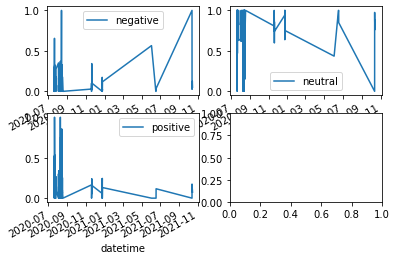

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)

commentsdf.plot(x = 'datetime', y = 'negative', ax = axes[0,0])
commentsdf.plot(x = 'datetime', y = 'neutral',  ax = axes[0,1])
commentsdf.plot(x = 'datetime', y = 'positive', ax = axes[1,0])